In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
from sklearn.feature_selection import mutual_info_classif

from skfeature.function.similarity_based import fisher_score
from matplotlib.pyplot import figure

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import SMOTE

# Loading Data

In [2]:
df = pd.read_csv("../datasets/Thesis_dataset.csv",header=None)

df = df.drop([0])

df.set_axis(['Fetal age','General menstrual cyclic status of mother','Type of pregnancy','Blood serotype of mother',
              'Past delivery number','Number of abortions','Diabetics history','Hypertension','Other illness',
             'Operation history','Presence of disabled childeren',
             'Presence of disabled children in father family','Covid history','Previous child home or hospital delivery',
            'Any other illness','Status'],axis=1,inplace=True)
df.shape

(183, 16)

In [3]:
df['Status'].value_counts()

0    150
1     33
Name: Status, dtype: int64

In [4]:
df.head()

,Fetal age,General menstrual cyclic status of mother,Type of pregnancy,Blood serotype of mother,Past delivery number,Number of abortions,Diabetics history,Hypertension,Other illness,Operation history,Presence of disabled childeren,Presence of disabled children in father family,Covid history,Previous child home or hospital delivery,Any other illness,Status
1,15,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
2,14,1,0,3,0,0,0,0,0,1,0,0,0,0,1,0
3,7,0,0,4,1,0,1,1,0,0,0,0,0,0,0,0
4,8,1,0,2,1,0,1,0,0,1,0,0,0,1,0,1
5,9,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0


# Data preprocessing

In [5]:
# y = df['Status'].values

In [6]:
# from sklearn.preprocessing import LabelEncoder
# labelEncoder = LabelEncoder()
# Y = labelEncoder.fit_transform(y)

In [7]:
# X_ = df.drop(["Status"],axis=1)
# X_ = X.to_numpy()

In [8]:
# feature_names = np.array(X_.columns)

In [9]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_)
# X = scaler.transform(X_)

In [10]:
# X.shape

# SMOTE

In [11]:
x_f_sm = df.drop(['Status'],axis=1)
y_f_sm = df['Status']

In [12]:
y_f_sm.value_counts()

0    150
1     33
Name: Status, dtype: int64

In [13]:
smote = SMOTE(sampling_strategy='minority')

In [14]:
x_sm,y_sm = smote.fit_sample(x_f_sm,y_f_sm)

In [15]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
Y_sm = labelEncoder.fit_transform(y_sm)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_sm)
X_sm = scaler.transform(x_sm)

In [17]:
X = X_sm

In [18]:
Y = Y_sm

# Train-Test split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_sm,Y_sm,test_size=0.2, random_state=42,stratify=Y_sm)

# Load the separate test data

In [20]:
test = pd.read_csv("../datasets/test_dataset.csv",header=None)

test= test.drop([0])

test.set_axis(['Fetal age','General menstrual cyclic status of mother','Type of pregnancy','Blood serotype of mother',
              'Past delivery number','Number of abortions','Diabetics history','Hypertension','Other illness',
             'Operation history','Presence of disabled childeren',
             'Presence of disabled children in father family','Covid history','Previous child home or hospital delivery',
            'Any other illness','Status'],axis=1,inplace=True)

In [21]:
test['Status'].value_counts()

0    24
1     6
Name: Status, dtype: int64

In [22]:
Y_t = test['Status'].values

labelEncoder = LabelEncoder()
Y_ = labelEncoder.fit_transform(Y_t)

X_ = test.drop(["Status"],axis=1)

scaler = StandardScaler()
scaler.fit(X_)
T = scaler.transform(X_)

T.shape

(30, 15)

# Feature selection

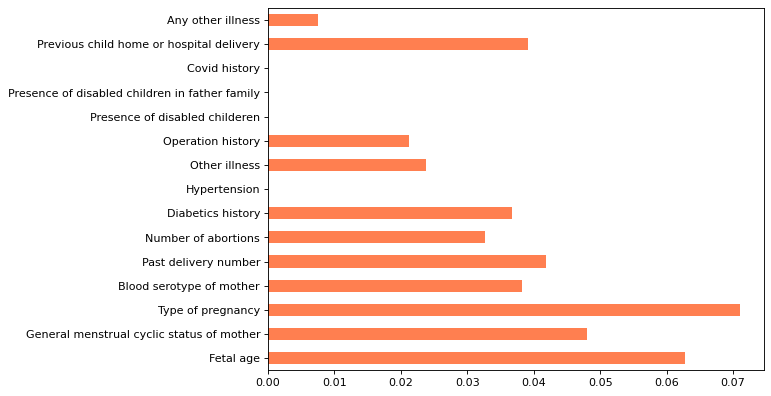

In [23]:
importances = mutual_info_classif(X,Y)

figure(figsize=(8, 6), dpi=80)
feat_importance = pd.Series(importances,df.columns[0:15])
feat_importance.plot(kind='barh',color='coral')
plt.show()

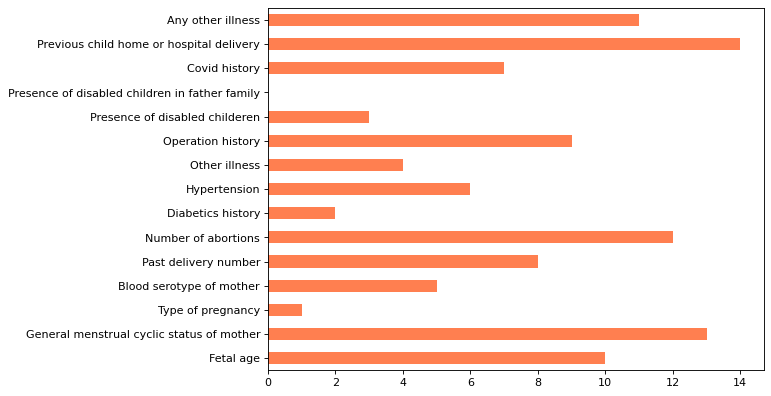

In [24]:
ranks = fisher_score.fisher_score(X,Y)

figure(figsize=(8, 6), dpi=80)
feat_importance = pd.Series(ranks,df.columns[0:15])
feat_importance.plot(kind='barh',color='coral')
plt.show()

# K-fold data

In [25]:
def avg(lst):
    return sum(lst) / len(lst)

In [26]:
kf = StratifiedKFold(n_splits=10)

x_train = []
x_test = []

y_train = []
y_test = []



for train, test in kf.split(X,Y):
    print('train: %s, test: %s' % (X[train].shape, X[test].shape))
    
    x_train.append(X[train])
    x_test.append(X[test])
    
    y_train.append(Y[train])
    y_test.append(Y[test])
    

train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)
train: (270, 15), test: (30, 15)


In [27]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


fold_1_train  = x_train[0][:][:]
fold_1_test  = x_test[0][:][:]

fold_1_train_l  = y_train[0][:][:]
fold_1_test_l  = y_test[0][:][:]       


fold_2_train  = x_train[1][:][:]
fold_2_test  = x_test[1][:][:]

fold_2_train_l  = y_train[1][:][:]
fold_2_test_l  = y_test[1][:][:]


fold_3_train  = x_train[2][:][:]
fold_3_test  = x_test[2][:][:]

fold_3_train_l  = y_train[2][:][:]
fold_3_test_l  = y_test[2][:][:]

fold_4_train  = x_train[3][:][:]
fold_4_test  = x_test[3][:][:]

fold_4_train_l  = y_train[3][:][:]
fold_4_test_l  = y_test[3][:][:]


fold_5_train  = x_train[4][:][:]
fold_5_test  = x_test[4][:][:]

fold_5_train_l  = y_train[4][:][:]
fold_5_test_l  = y_test[4][:][:]


fold_6_train  = x_train[5][:][:]
fold_6_test  = x_test[5][:][:]

fold_6_train_l  = y_train[5][:][:]
fold_6_test_l  = y_test[5][:][:]

fold_7_train  = x_train[6][:][:]
fold_7_test  = x_test[6][:][:]

fold_7_train_l  = y_train[6][:][:]
fold_7_test_l  = y_test[6][:][:]

fold_8_train  = x_train[7][:][:]
fold_8_test  = x_test[7][:][:]

fold_8_train_l  = y_train[7][:][:]
fold_8_test_l  = y_test[7][:][:]

fold_9_train  = x_train[8][:][:]
fold_9_test  = x_test[8][:][:]

fold_9_train_l  = y_train[8][:][:]
fold_9_test_l  = y_test[8][:][:]

fold_10_train  = x_train[9][:][:]
fold_10_test  = x_test[9][:][:]

fold_10_train_l  = y_train[9][:][:]
fold_10_test_l  = y_test[9][:][:]
        
    
# print(fold_1_train.shape)
# print(fold_2_train.shape)
# print(fold_3_train.shape)
# print(fold_4_train.shape)
# print(fold_5_train.shape)
# print(fold_6_train.shape)
# print(fold_7_train.shape)
# print(fold_8_train.shape)
# print(fold_9_train.shape)
# print(fold_10_train.shape)


# K-fold cross validation

Logistic regression

In [28]:
arr = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.53333333 0.7        0.76666667 0.76666667 0.8        0.66666667
 0.73333333 0.83333333 0.9        0.76666667]

 0.7466666666666667


Decision Tree

In [29]:
arr = cross_val_score(DecisionTreeClassifier(random_state=0), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.7        0.76666667 0.86666667 0.76666667 0.93333333 0.66666667
 0.86666667 0.76666667 0.9        0.83333333]

 0.8066666666666666


Random Forest

In [30]:
arr = cross_val_score(RandomForestClassifier(max_depth=4, random_state=4), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.7        0.73333333 0.83333333 0.7        0.86666667 0.63333333
 0.76666667 0.8        0.9        0.73333333]

 0.7666666666666667


K nearest neighbors

In [31]:
arr = cross_val_score(KNeighborsClassifier(n_neighbors=19), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.63333333 0.7        0.76666667 0.73333333 0.83333333 0.66666667
 0.73333333 0.9        0.83333333 0.83333333]

 0.7633333333333334


Linear Regression

In [32]:
arr = cross_val_score(LinearRegression(), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[-0.52485336 -0.02202976 -0.25395972 -0.94169573 -0.29418849 -0.60183673
 -0.99395234  0.          0.          0.        ]

 -0.36325161332184175


Support vector machine

In [33]:
arr = cross_val_score(SVC(kernel="linear",random_state=4), X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.6        0.66666667 0.66666667 0.73333333 0.76666667 0.56666667
 0.73333333 0.86666667 0.9        0.8       ]

 0.73


LightGBM

In [34]:
lgb_clf = lgb.LGBMClassifier(learning_rate = 0.05, boosting_type = 'DART',
                  objective='binary',
                  metric = ['auc','binary_logloss'],
                  num_leaves=10,
                  max_depth=50 )

In [35]:
lgb_clf.fit(X_train,Y_train)

LGBMClassifier(boosting_type='DART', learning_rate=0.05, max_depth=50,
               metric=['auc', 'binary_logloss'], num_leaves=10,
               objective='binary')

In [36]:
arr = cross_val_score(lgb_clf , X, Y,cv=10)
avg_score = avg(arr)
print(arr)
print('\n',avg_score)

[0.53333333 0.7        0.83333333 0.6        0.93333333 0.66666667
 0.7        0.86666667 0.93333333 0.83333333]

 0.76


# Helper functions

In [37]:
def predicted_class(test_data,prediction,threshold):
    
    pred = []
    
    for i in range(0,len(test_data)):
        if prediction[i]>=threshold:
            pred.append(1)
        else:
            pred.append(0)
            
    return pred

In [38]:
def generate_cm(clf,X_train,Y_train,X_test,Y_test,threshold):

    clf.fit(X_train, Y_train)
    pred = clf.predict(X_test)

    pred = predicted_class(Y_test,pred,threshold)

    confusionMatrix  = metrics.confusion_matrix(Y_test,pred)
    sns.heatmap(confusionMatrix,annot=True)
    plt.title('Confusion Matrix\n', fontsize = 20)
    plt.show()

# Logistic Regression

In [39]:
clf = LogisticRegression(random_state=0).fit(X_train, Y_train)

In [40]:
y_pred_logistic = clf.predict(X_test)

In [41]:
clf.score(X_test,Y_test)

0.7166666666666667

# Decision Tree

In [42]:
decision_tress_clf = DecisionTreeClassifier(random_state=0)

In [43]:
decision_tress_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [44]:
y_pred_tree = decision_tress_clf.predict(X_test)

In [45]:
decision_tress_clf.score(X_test, Y_test)

0.8166666666666667

# Random forest

In [46]:
rand_forest_clf = RandomForestClassifier(max_depth=4, random_state=4)
rand_forest_clf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, random_state=4)

In [47]:
rand_forest_clf.score(X_test, Y_test)

0.75

In [48]:
rand_forest_pred = rand_forest_clf.predict(X_test)

# K-nearest neighbors

In [49]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [50]:
KNN_pred = neigh.predict(X_test)

In [51]:
neigh.score(X_test, Y_test)

0.8

# Linear Regression 

In [52]:
reg_clf = LinearRegression().fit(X_train, Y_train)

In [53]:
y_pred_reg = reg_clf.predict(X_test)

In [54]:
pred_reg = []

for i in range(0,len(Y_test)):
    if y_pred_reg[i]>= 0.25:
        pred_reg.append(1)
    else:
        pred_reg.append(0)

# Testing the Linear Regression Model

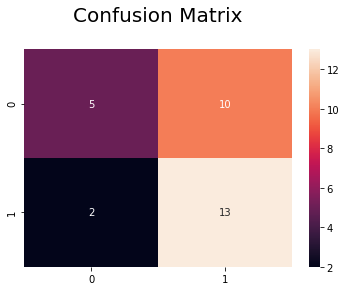

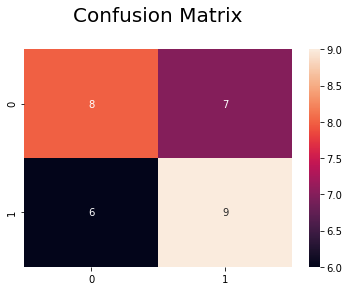

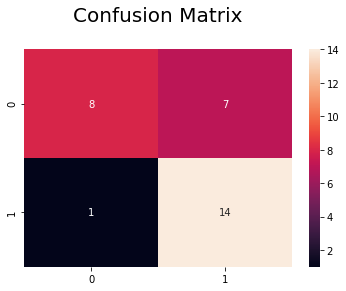

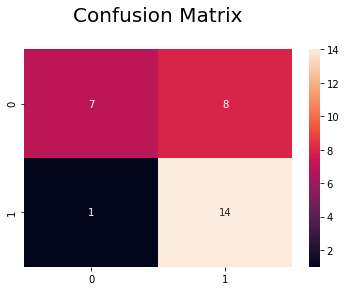

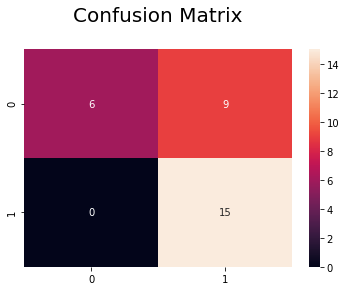

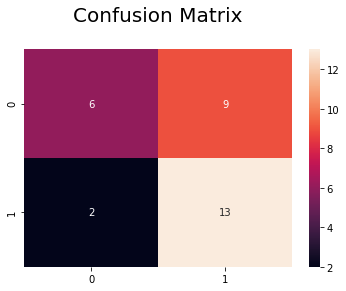

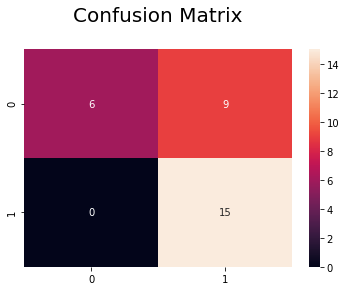

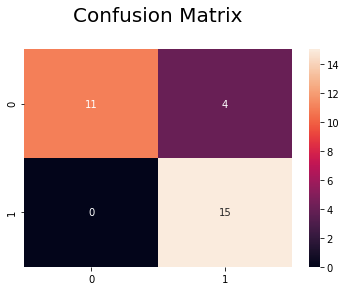

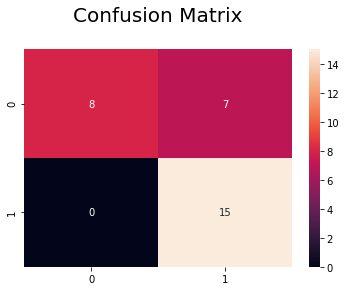

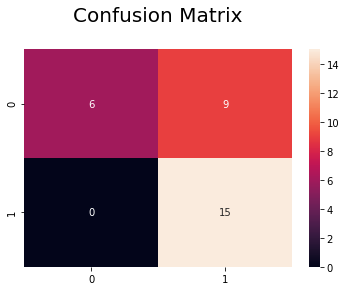

In [55]:
generate_cm(reg_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,0.25)
generate_cm(reg_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,0.25)
generate_cm(reg_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,0.25)
generate_cm(reg_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,0.25)
generate_cm(reg_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,0.25)
    
generate_cm(reg_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,0.25)
generate_cm(reg_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,0.25)
generate_cm(reg_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,0.25)
generate_cm(reg_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,0.25)
generate_cm(reg_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,0.25)

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        30
           1       0.64      0.93      0.76        30

    accuracy                           0.70        60
   macro avg       0.76      0.70      0.68        60
weighted avg       0.76      0.70      0.68        60



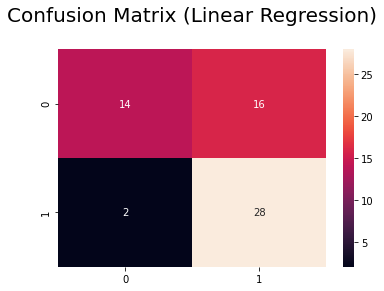

In [56]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_reg)
print(metrics.classification_report(Y_test,pred_reg))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (Linear Regression)\n', fontsize = 20)
plt.show()

# SVM model

In [57]:
svm_clf = SVC(kernel="linear",random_state=4)
svm_clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=4)

In [58]:
y_pred_svm = svm_clf.decision_function(X_test)

In [59]:
pred_svm = []
for i in range(0,len(Y_test)):
    if y_pred_svm[i]>=-0.874056:
        pred_svm.append(1)
    else:
        pred_svm.append(0)

In [60]:
def generate_cm_svm(clf,X_train,Y_train,X_test,Y_test,threshold):

    clf.fit(X_train, Y_train)
    pred = clf.decision_function(X_test)
    pred = predicted_class(Y_test,pred,threshold)

    confusionMatrix  = metrics.confusion_matrix(Y_test,pred)
    sns.heatmap(confusionMatrix,annot=True)
    plt.title('Confusion Matrix(LightGbm)\n', fontsize = 20)
    plt.show()

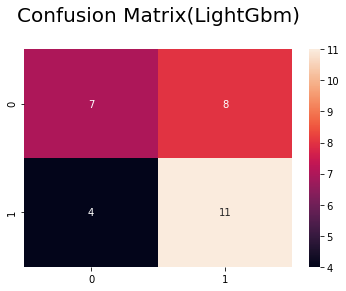

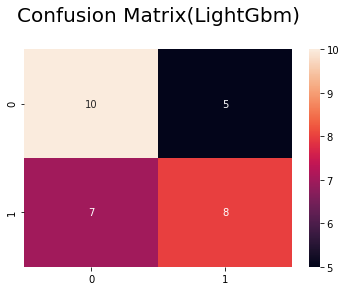

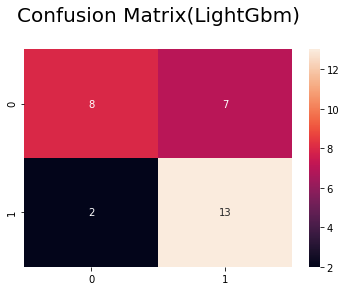

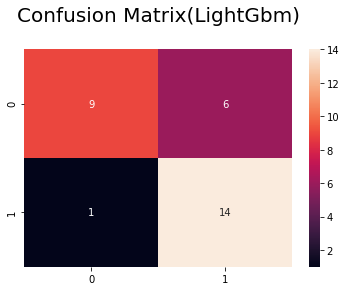

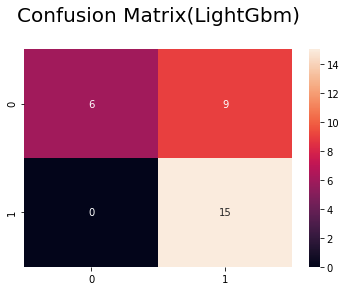

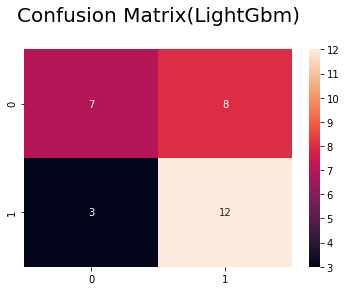

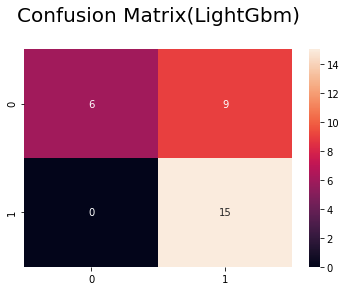

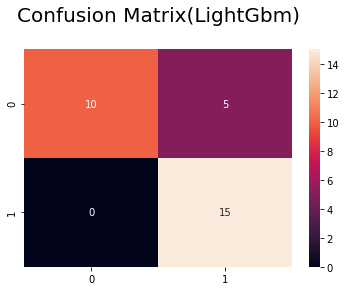

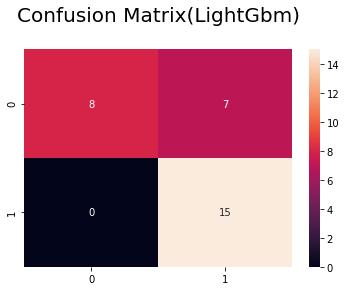

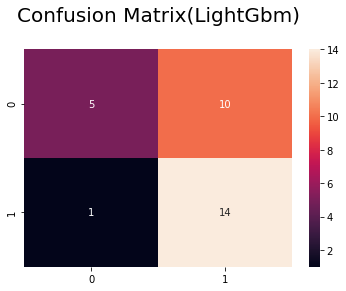

In [61]:
generate_cm_svm(svm_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,-0.865222)
    
generate_cm_svm(svm_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,-0.865222)
generate_cm_svm(svm_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,-0.865222)

# SVM on Separate Test Data

In [62]:
y_pred_svm_test = svm_clf.decision_function(T)

In [63]:
pred_svm_test = predicted_class(Y_,y_pred_svm_test,-0.865222)

              precision    recall  f1-score   support

           0       0.75      0.12      0.21        24
           1       0.19      0.83      0.31         6

    accuracy                           0.27        30
   macro avg       0.47      0.48      0.26        30
weighted avg       0.64      0.27      0.23        30



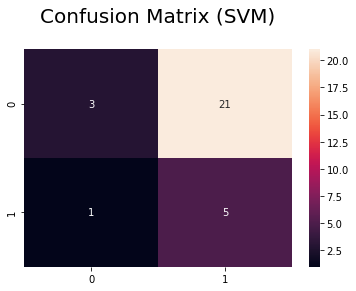

In [64]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_,pred_svm_test)
print(metrics.classification_report(Y_,pred_svm_test))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (SVM)\n', fontsize = 20)
plt.show()

# Lgbm Model

In [65]:
lgb_clf = lgb.LGBMRegressor(learning_rate = 0.05, boosting_type = 'DART',
                  objective='binary',
                  metric = ['auc','binary_logloss'],
                  num_leaves=10,
                  max_depth=50 )

# Testing the Lgbm Model

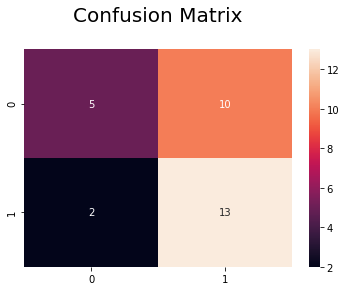

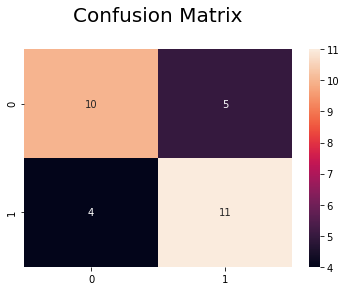

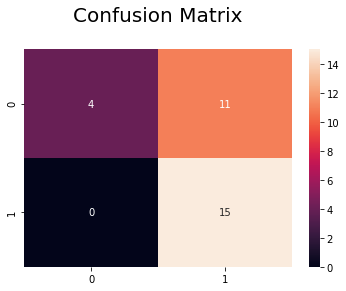

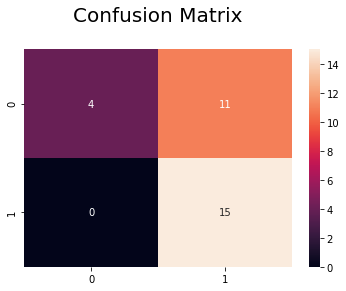

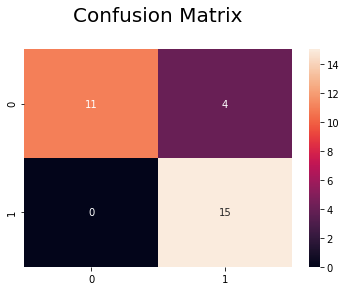

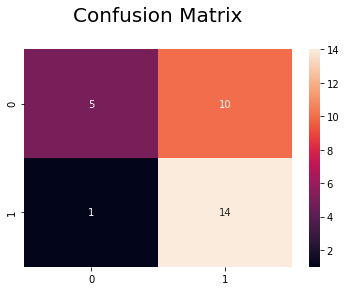

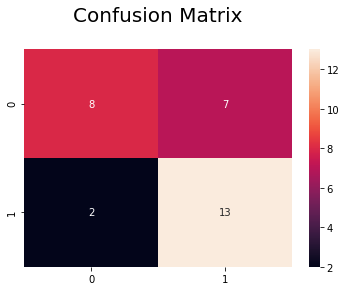

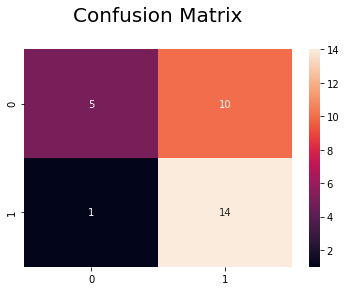

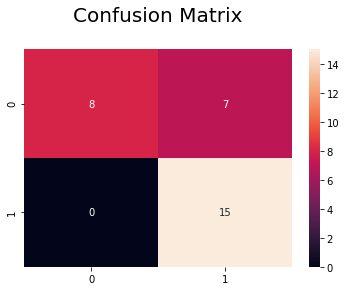

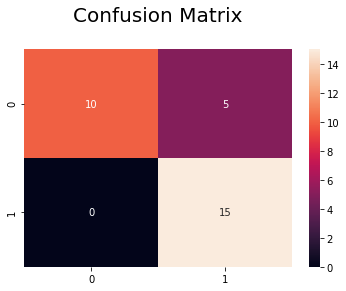

In [66]:
generate_cm(lgb_clf,fold_1_train,fold_1_train_l,fold_1_test,fold_1_test_l,0.27)
generate_cm(lgb_clf,fold_2_train,fold_2_train_l,fold_2_test,fold_2_test_l,0.27)
generate_cm(lgb_clf,fold_3_train,fold_3_train_l,fold_3_test,fold_3_test_l,0.27)
generate_cm(lgb_clf,fold_4_train,fold_4_train_l,fold_4_test,fold_4_test_l,0.27)
generate_cm(lgb_clf,fold_5_train,fold_5_train_l,fold_5_test,fold_5_test_l,0.27)
    
generate_cm(lgb_clf,fold_6_train,fold_6_train_l,fold_6_test,fold_6_test_l,0.27)
generate_cm(lgb_clf,fold_7_train,fold_7_train_l,fold_7_test,fold_7_test_l,0.27)
generate_cm(lgb_clf,fold_8_train,fold_8_train_l,fold_8_test,fold_8_test_l,0.27)
generate_cm(lgb_clf,fold_9_train,fold_9_train_l,fold_9_test,fold_9_test_l,0.27)
generate_cm(lgb_clf,fold_10_train,fold_10_train_l,fold_10_test,fold_10_test_l,0.27)

In [67]:
y_pred_lgbm = lgb_clf.predict(X_test)

In [68]:
pred_lgbm = []

for i in range(0,len(X_test)):
    if y_pred_lgbm[i]>=0.27:
        pred_lgbm.append(1)
    else:
        pred_lgbm.append(0)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        30
           1       0.64      1.00      0.78        30

    accuracy                           0.72        60
   macro avg       0.82      0.72      0.69        60
weighted avg       0.82      0.72      0.69        60



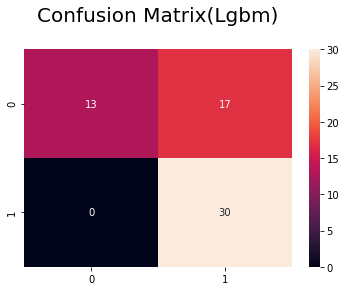

In [69]:
lgbm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_lgbm)
print(metrics.classification_report(Y_test,pred_lgbm))

sns.heatmap(lgbm_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Lgbm)\n', fontsize = 20)
plt.show()

# Lgbm on separate test data

In [70]:
y_pred_lgbm_test = lgb_clf.predict(T)

In [71]:
pred_lgbm_test = predicted_class(Y_,y_pred_lgbm_test,0.27)

              precision    recall  f1-score   support

           0       0.80      0.33      0.47        24
           1       0.20      0.67      0.31         6

    accuracy                           0.40        30
   macro avg       0.50      0.50      0.39        30
weighted avg       0.68      0.40      0.44        30



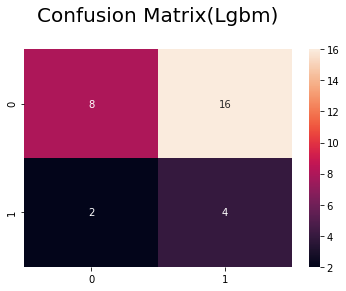

In [72]:
rand_forest_confusionMatrix  = metrics.confusion_matrix(Y_,pred_lgbm_test)
print(metrics.classification_report(Y_,pred_lgbm_test))

sns.heatmap(rand_forest_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Lgbm)\n', fontsize = 20)
plt.show()

# XGboost

In [73]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',seed=42,booster='gblinear',learning_rate=0.01,eval_metric = 'auc',use_label_encoder=False)

clf_xgb.fit(X_train,
            Y_train,
            verbose=True,
)

score_arr =  cross_val_score(clf_xgb, X, Y,cv=10)

In [74]:
y_pred_boost = clf_xgb.predict(X_test)

# CNN

In [75]:
model = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(64, activation='relu'),
                    keras.layers.Dense(64, activation='relu'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
output (Dense)               (None, 2)                 130       
Total params: 5,314
Trainable params: 5,314
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='sgd',
            metrics= ['accuracy']
            )

In [77]:
history = model.fit(X_train, Y_train, epochs=130, validation_split=0.2)

Epoch 1/130
6/6 [==============================] - 0s 23ms/step - loss: 0.7003 - accuracy: 0.5000 - val_loss: 0.6659 - val_accuracy: 0.5000
Epoch 2/130
6/6 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.4948 - val_loss: 0.6501 - val_accuracy: 0.5208
Epoch 3/130
6/6 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.5000 - val_loss: 0.6369 - val_accuracy: 0.5833
Epoch 4/130
6/6 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.5521 - val_loss: 0.6260 - val_accuracy: 0.6458
Epoch 5/130
6/6 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6146 - val_loss: 0.6166 - val_accuracy: 0.7083
Epoch 6/130
6/6 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6615 - val_loss: 0.6085 - val_accuracy: 0.7500
Epoch 7/130
6/6 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.6823 - val_loss: 0.6012 - val_accuracy: 0.7708
Epoch 8/130
6/6 [=========

6/6 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8177 - val_loss: 0.4680 - val_accuracy: 0.7917
Epoch 60/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8177 - val_loss: 0.4672 - val_accuracy: 0.7917
Epoch 61/130
6/6 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8177 - val_loss: 0.4665 - val_accuracy: 0.7917
Epoch 62/130
6/6 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8177 - val_loss: 0.4660 - val_accuracy: 0.7708
Epoch 63/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8229 - val_loss: 0.4654 - val_accuracy: 0.7708
Epoch 64/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8229 - val_loss: 0.4648 - val_accuracy: 0.7708
Epoch 65/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8229 - val_loss: 0.4643 - val_accuracy: 0.7708
Epoch 66/130
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8698 - val_loss: 0.4666 - val_accuracy: 0.8125
Epoch 118/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8698 - val_loss: 0.4669 - val_accuracy: 0.8125
Epoch 119/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8698 - val_loss: 0.4672 - val_accuracy: 0.8125
Epoch 120/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8698 - val_loss: 0.4674 - val_accuracy: 0.8125
Epoch 121/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8750 - val_loss: 0.4677 - val_accuracy: 0.8125
Epoch 122/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8750 - val_loss: 0.4680 - val_accuracy: 0.8125
Epoch 123/130
6/6 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8750 - val_loss: 0.4684 - val_accuracy: 0.8125
Epoch 124/130
6/6 [========

In [78]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

2/2 [==============================] - 0s 514us/step - loss: 0.5494 - accuracy: 0.7500

Test Accuracy: 0.75

Test Loss: 0.54936683177948


In [79]:
y_pred_cnn = model.predict(X_test)

cnn_pred = []
for i in range(len(X_test)):
    cnn_pred.append(np.argmax(y_pred_cnn[i]))

====================================================Accuracy Score========================================================

# Accuracy score

In [80]:
print("Accuracy score of lgbm: ",metrics.accuracy_score(Y_test, pred_lgbm))
print("Accuracy score of svm: ",metrics.accuracy_score(Y_test, pred_svm))
print("Accuracy score of linear regression: ",metrics.accuracy_score(Y_test, pred_reg))

print("Accuracy score of KNN: ",metrics.accuracy_score(Y_test, KNN_pred))
print("Accuracy score of logistic regression: ",metrics.accuracy_score(Y_test, y_pred_logistic))
print("Accuracy score of decision tree: ",metrics.accuracy_score(Y_test, y_pred_tree))

print("Accuracy score of random forest: ",metrics.accuracy_score(Y_test, rand_forest_pred))
print("Accuracy score of Xgboost: ",metrics.accuracy_score(Y_test, y_pred_boost))
print("Accuracy score of CNN: ",metrics.accuracy_score(Y_test, cnn_pred))

Accuracy score of lgbm:  0.7166666666666667
Accuracy score of svm:  0.6666666666666666
Accuracy score of linear regression:  0.7
Accuracy score of KNN:  0.8
Accuracy score of logistic regression:  0.7166666666666667
Accuracy score of decision tree:  0.8166666666666667
Accuracy score of random forest:  0.75
Accuracy score of Xgboost:  0.7666666666666667
Accuracy score of CNN:  0.75


# Probabilities 

In [81]:
knn_pred_proba = neigh.predict_proba(X_test)[:,1]
log_pred_proba = clf.decision_function(X_test)
tree_pred_proba = decision_tress_clf.predict_proba(X_test)[:,1]
rand_pred_proba = rand_forest_clf.predict_proba(X_test)[:,1]
boost_pred_proba = clf_xgb.predict_proba(X_test)[:,1]
cnn_pred_proba = model.predict(X_test)[:,1]

# AUC score

In [82]:
print("AUC scrore for lgbm: ",metrics.roc_auc_score(Y_test,y_pred_lgbm))
print("AUC scrore for SVM: ",metrics.roc_auc_score(Y_test,y_pred_svm))
print("AUC scrore for linear regression: ",metrics.roc_auc_score(Y_test,y_pred_reg))

print("AUC scrore for KNN: ",metrics.roc_auc_score(Y_test,knn_pred_proba))
print("AUC scrore for logistic regression: ",metrics.roc_auc_score(Y_test,log_pred_proba))
print("AUC scrore for decision tree: ",metrics.roc_auc_score(Y_test,tree_pred_proba))

print("AUC scrore for random forest: ",metrics.roc_auc_score(Y_test,rand_pred_proba))
print("AUC scrore for Xgboost: ",metrics.roc_auc_score(Y_test,boost_pred_proba))
print("AUC scrore for CNN: ",metrics.roc_auc_score(Y_test,cnn_pred_proba))

AUC scrore for lgbm:  0.8666666666666667
AUC scrore for SVM:  0.7633333333333333
AUC scrore for linear regression:  0.8011111111111111
AUC scrore for KNN:  0.861111111111111
AUC scrore for logistic regression:  0.7977777777777778
AUC scrore for decision tree:  0.8305555555555556
AUC scrore for random forest:  0.8455555555555556
AUC scrore for Xgboost:  0.8133333333333334
AUC scrore for CNN:  0.8288888888888889


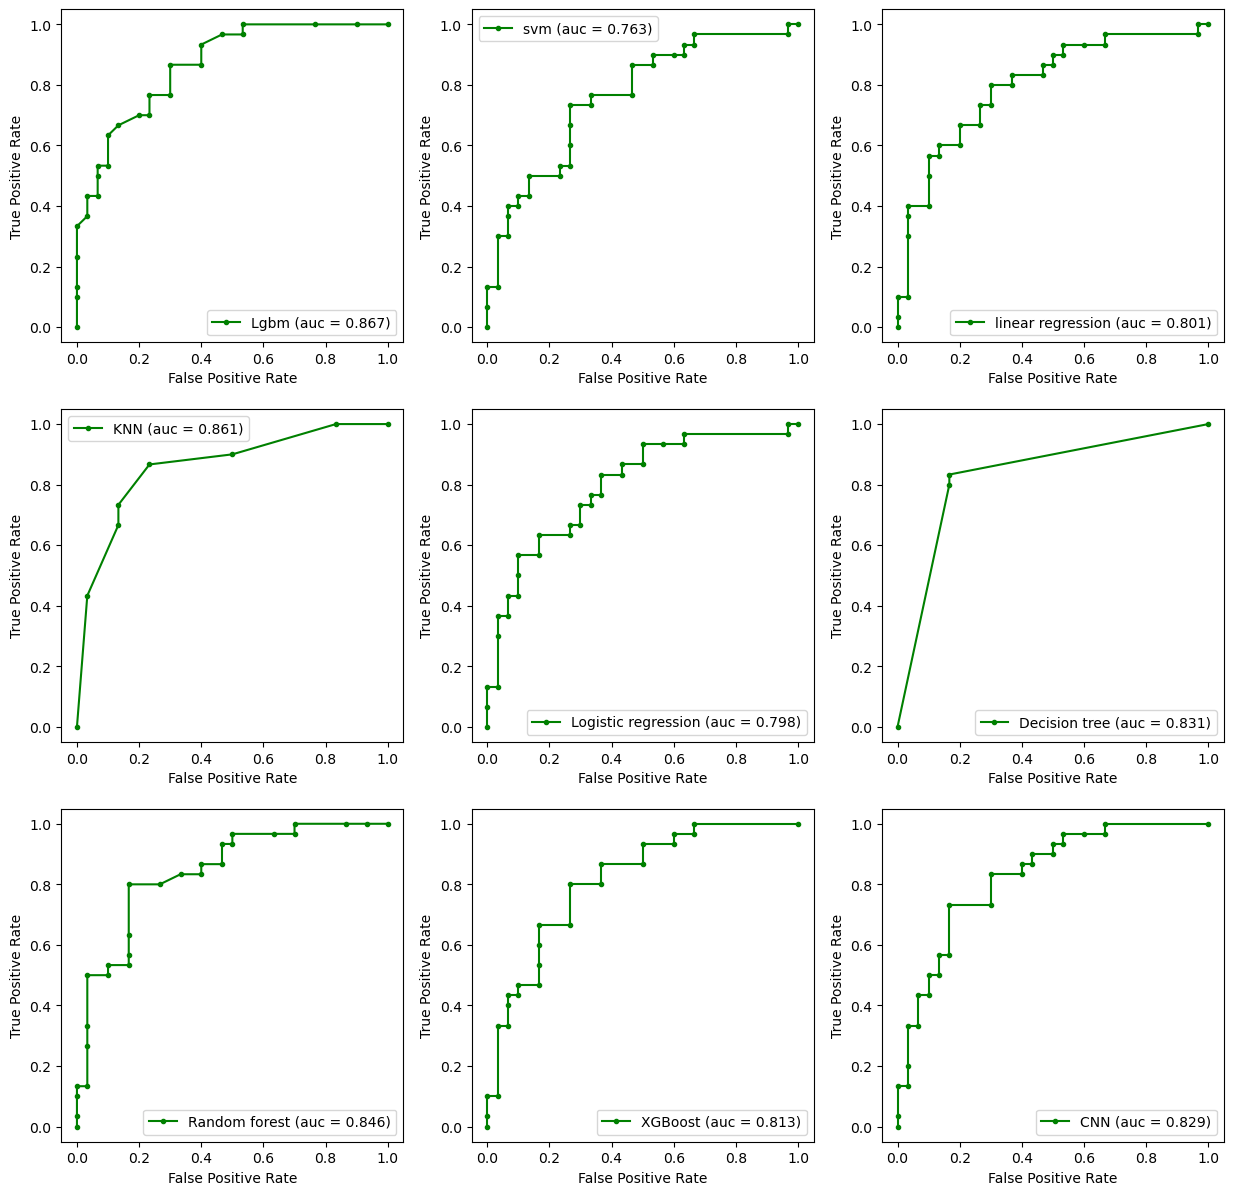

In [83]:
lgbm_fpr,lgbm_tpr, lgbm_threshold = roc_curve(Y_test, y_pred_lgbm)
auc_lgbm = auc(lgbm_fpr, lgbm_tpr)


svm_fpr,svm_tpr, svm_threshold = roc_curve(Y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)


reg_fpr,reg_tpr, reg_threshold = roc_curve(Y_test, y_pred_reg)
auc_reg = auc(reg_fpr, reg_tpr)

knn_fpr,knn_tpr, knn_threshold = roc_curve(Y_test,knn_pred_proba)
auc_knn = auc(knn_fpr, knn_tpr)


log_fpr,log_tpr, log_threshold = roc_curve(Y_test,log_pred_proba)
auc_log = auc(log_fpr, log_tpr)

tree_fpr,tree_tpr, tree_threshold = roc_curve(Y_test, tree_pred_proba)
auc_tree = auc(tree_fpr, tree_tpr)

rand_fpr,rand_tpr, rand_threshold = roc_curve(Y_test, rand_pred_proba)
auc_rand = auc(rand_fpr, rand_tpr)

boost_fpr,boost_tpr, boost_threshold = roc_curve(Y_test, boost_pred_proba)
auc_boost = auc(boost_fpr, boost_tpr)

cnn_fpr,cnn_tpr, cnn_threshold = roc_curve(Y_test, cnn_pred_proba)
auc_cnn = auc(cnn_fpr, cnn_tpr)


plt.figure(figsize=(15, 15), dpi=100)

plt.subplot(3,3,1)
plt.plot(lgbm_fpr, lgbm_tpr, marker='.',color='g', label='Lgbm (auc = %0.3f)' % auc_lgbm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,2)
plt.plot(svm_fpr, svm_tpr, marker='.',color='g', label='svm (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,3)
plt.plot(reg_fpr, reg_tpr, marker='.',color='g', label='linear regression (auc = %0.3f)' % auc_reg)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,4)
plt.plot(knn_fpr, knn_tpr, marker='.',color='g', label='KNN (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,5)
plt.plot(log_fpr, log_tpr, marker='.',color='g', label='Logistic regression (auc = %0.3f)' % auc_log)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,6)
plt.plot(tree_fpr, tree_tpr, marker='.',color='g', label='Decision tree (auc = %0.3f)' % auc_tree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,7)
plt.plot(rand_fpr, rand_tpr, marker='.',color='g', label='Random forest (auc = %0.3f)' % auc_rand)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,8)
plt.plot(boost_fpr, boost_tpr, marker='.',color='g', label='XGBoost (auc = %0.3f)' % auc_boost)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(3,3,9)
plt.plot(cnn_fpr, cnn_tpr, marker='.',color='g', label='CNN (auc = %0.3f)' % auc_cnn)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

=================================================Confusion Matrix=======================================================

# Confusion matrix (Linear Regression)

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        30
           1       0.64      0.93      0.76        30

    accuracy                           0.70        60
   macro avg       0.76      0.70      0.68        60
weighted avg       0.76      0.70      0.68        60



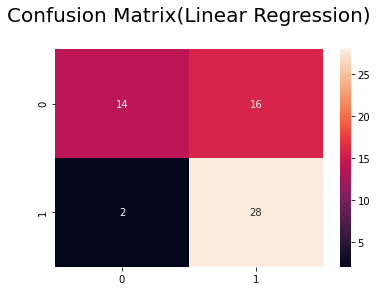

In [84]:
linear_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_reg)
print(metrics.classification_report(Y_test,pred_reg))

sns.heatmap(linear_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Linear Regression)\n', fontsize = 20)
plt.show()

In [85]:
sensitivity_linear = linear_confusionMatrix[0][0]/(linear_confusionMatrix[0][0]+linear_confusionMatrix[0][1])
specificity_linear = linear_confusionMatrix[1][1]/(linear_confusionMatrix[1][1]+linear_confusionMatrix[1][0])
print(sensitivity_linear,specificity_linear)

0.4666666666666667 0.9333333333333333


# Decision Tress

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.83      0.80      0.81        30

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



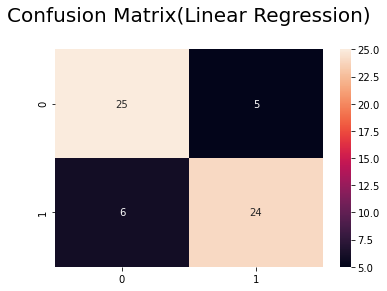

In [86]:
tree_confusionMatrix  = metrics.confusion_matrix(Y_test,y_pred_tree)
print(metrics.classification_report(Y_test,y_pred_tree))

sns.heatmap(tree_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Linear Regression)\n', fontsize = 20)
plt.show()

In [87]:
sensitivity_tree = tree_confusionMatrix[0][0]/(tree_confusionMatrix[0][0]+tree_confusionMatrix[0][1])
specificity_tree = tree_confusionMatrix[1][1]/(tree_confusionMatrix[1][1]+tree_confusionMatrix[1][0])
print(sensitivity_tree,specificity_tree)

0.8333333333333334 0.8


# Confusion matrix (logistic regression)

              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.69      0.80      0.74        30

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.71        60
weighted avg       0.72      0.72      0.71        60



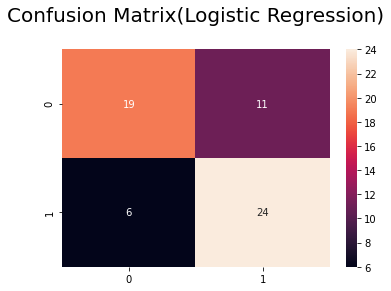

In [88]:
logistic_confusionMatrix  = metrics.confusion_matrix(Y_test,y_pred_logistic)
print(metrics.classification_report(Y_test,y_pred_logistic))

sns.heatmap(logistic_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

In [89]:
sensitivity_logistic = logistic_confusionMatrix[0][0]/(logistic_confusionMatrix[0][0]+logistic_confusionMatrix[0][1])
specificity_logistic = logistic_confusionMatrix[1][1]/(logistic_confusionMatrix[1][1]+logistic_confusionMatrix[1][0])
print(sensitivity_logistic,specificity_logistic)

0.6333333333333333 0.8


# Confusion matrix (Random Forest)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        30
           1       0.80      0.67      0.73        30

    accuracy                           0.75        60
   macro avg       0.76      0.75      0.75        60
weighted avg       0.76      0.75      0.75        60



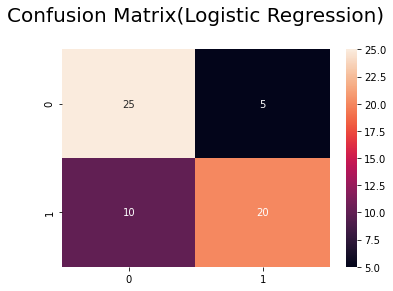

In [90]:
forest_confusionMatrix  = metrics.confusion_matrix(Y_test,rand_forest_pred)
print(metrics.classification_report(Y_test,rand_forest_pred))

sns.heatmap(forest_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

In [91]:
sensitivity_forest = forest_confusionMatrix[0][0]/(forest_confusionMatrix[0][0]+forest_confusionMatrix[0][1])
specificity_forest = forest_confusionMatrix[1][1]/(forest_confusionMatrix[1][1]+forest_confusionMatrix[1][0])
print(sensitivity_forest,specificity_forest)

0.8333333333333334 0.6666666666666666


# Confusion matrix (KNN)

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        30
           1       0.85      0.73      0.79        30

    accuracy                           0.80        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



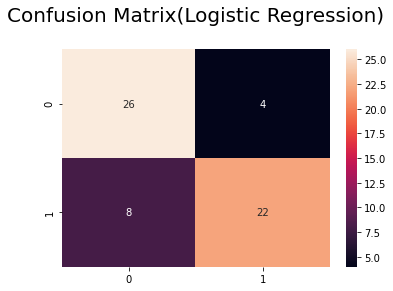

In [92]:
KNN_confusionMatrix  = metrics.confusion_matrix(Y_test,KNN_pred)
print(metrics.classification_report(Y_test,KNN_pred))

sns.heatmap(KNN_confusionMatrix,annot=True)
plt.title('Confusion Matrix(Logistic Regression)\n', fontsize = 20)
plt.show()

In [93]:
sensitivity_KNN = KNN_confusionMatrix[0][0]/(KNN_confusionMatrix[0][0]+KNN_confusionMatrix[0][1])
specificity_KNN = KNN_confusionMatrix[1][1]/(KNN_confusionMatrix[1][1]+KNN_confusionMatrix[1][0])
print(sensitivity_KNN,specificity_KNN)

0.8666666666666667 0.7333333333333333


# Confusion matrix (Lgbm)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        30
           1       0.64      1.00      0.78        30

    accuracy                           0.72        60
   macro avg       0.82      0.72      0.69        60
weighted avg       0.82      0.72      0.69        60



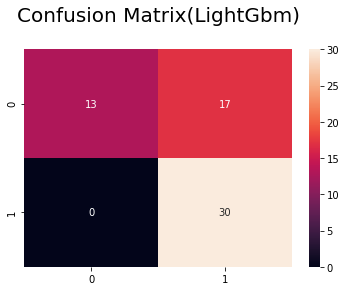

In [94]:
lgbm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_lgbm)
print(metrics.classification_report(Y_test,pred_lgbm))
sns.heatmap(lgbm_confusionMatrix,annot=True)
plt.title('Confusion Matrix(LightGbm)\n', fontsize = 20)
plt.show()

In [95]:
sensitivity_lgbm = lgbm_confusionMatrix[0][0]/(lgbm_confusionMatrix[0][0]+lgbm_confusionMatrix[0][1])
specificity_lgbm = lgbm_confusionMatrix[1][1]/(lgbm_confusionMatrix[1][1]+lgbm_confusionMatrix[1][0])
print(sensitivity_lgbm,specificity_lgbm)

0.43333333333333335 1.0


# Confusion matrix (SVM)

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        30
           1       0.62      0.87      0.72        30

    accuracy                           0.67        60
   macro avg       0.70      0.67      0.65        60
weighted avg       0.70      0.67      0.65        60



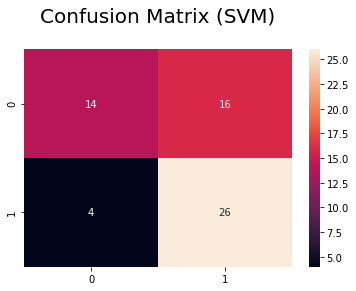

In [96]:
svm_confusionMatrix  = metrics.confusion_matrix(Y_test,pred_svm)
print(metrics.classification_report(Y_test,pred_svm))
sns.heatmap(svm_confusionMatrix,annot=True)
plt.title('Confusion Matrix (SVM)\n', fontsize = 20)
plt.show()

In [97]:
sensitivity_svm = svm_confusionMatrix[0][0]/(svm_confusionMatrix[0][0]+svm_confusionMatrix[0][1])
specificity_svm = svm_confusionMatrix[1][1]/(svm_confusionMatrix[1][1]+svm_confusionMatrix[1][0])
print(sensitivity_svm,specificity_svm)

0.4666666666666667 0.8666666666666667


# Confusion matrix (XGboost)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.75      0.80      0.77        30

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



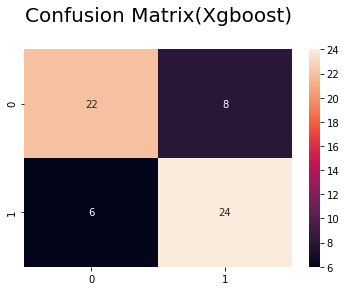

In [98]:
confusionMatrix_boost  = metrics.confusion_matrix(Y_test,y_pred_boost)
print(metrics.classification_report(Y_test,y_pred_boost))

sns.heatmap(confusionMatrix_boost,annot=True)
plt.title('Confusion Matrix(Xgboost)\n', fontsize = 20)
plt.show()

In [99]:
sensitivity_boost = confusionMatrix_boost[0][0]/(confusionMatrix_boost[0][0]+confusionMatrix_boost[0][1])
specificity_boost = confusionMatrix_boost[1][1]/(confusionMatrix_boost[1][1]+confusionMatrix_boost[1][0])
print(sensitivity_boost,specificity_boost)

0.7333333333333333 0.8


# Confusion matrix (CNN)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.73      0.80      0.76        30

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



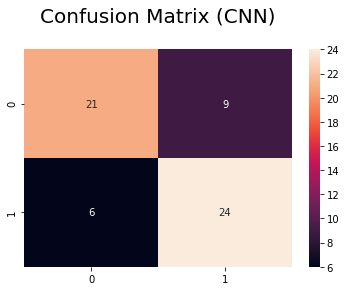

In [100]:
cnn_confusionMatrix  = metrics.confusion_matrix(Y_test,cnn_pred)
print(metrics.classification_report(Y_test,cnn_pred))
sns.heatmap(cnn_confusionMatrix,annot=True)
plt.title('Confusion Matrix (CNN)\n', fontsize = 20)
plt.show()

In [101]:
sensitivity_cnn = cnn_confusionMatrix[0][0]/(cnn_confusionMatrix[0][0]+cnn_confusionMatrix[0][1])
specificity_cnn = cnn_confusionMatrix[1][1]/(cnn_confusionMatrix[1][1]+cnn_confusionMatrix[1][0])
print(sensitivity_cnn,specificity_cnn)

0.7 0.8


# ROC Curve

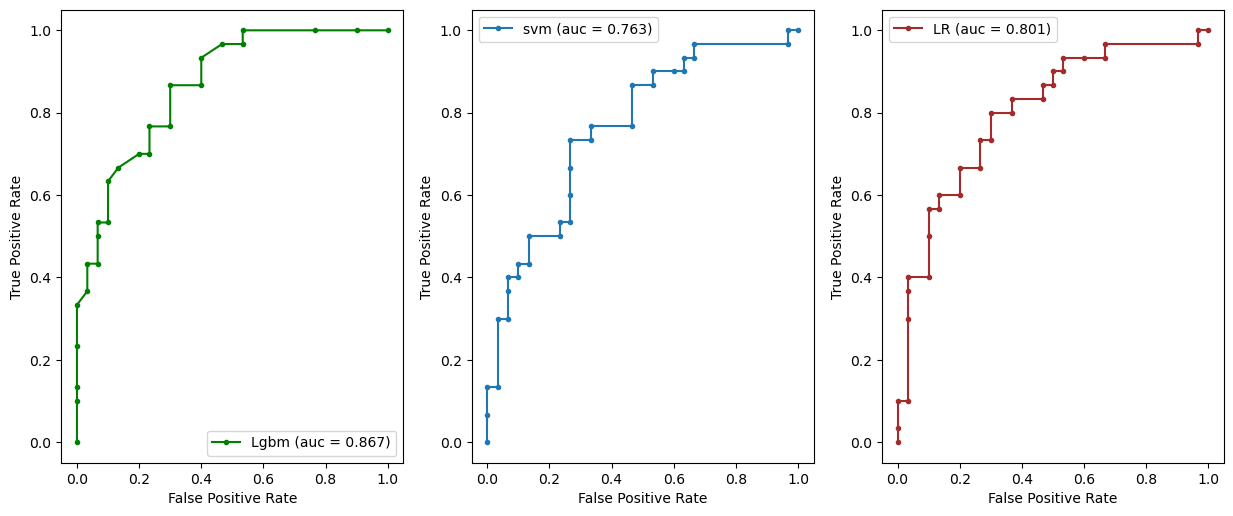

In [102]:
lgbm_fpr,lgbm_tpr, lgbm_threshold = roc_curve(Y_test, y_pred_lgbm)
auc_lgbm = auc(lgbm_fpr, lgbm_tpr)


svm_fpr,svm_tpr, svm_threshold = roc_curve(Y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

reg_fpr,reg_tpr, reg_threshold = roc_curve(Y_test,y_pred_reg)
auc_reg = auc(reg_fpr, reg_tpr)

plt.figure(figsize=(15, 6), dpi=100)

plt.subplot(1,3,1)

plt.plot(lgbm_fpr, lgbm_tpr, marker='.',color='g', label='Lgbm (auc = %0.3f)' % auc_lgbm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.subplot(1,3,2)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.subplot(1,3,3)
plt.plot(reg_fpr, reg_tpr, marker='.',color='brown', label='LR (auc = %0.3f)' % auc_reg)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [103]:
i = np.arange(len(lgbm_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(lgbm_tpr-(1-lgbm_fpr), index=i), 'thresholds' : pd.Series(lgbm_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  15    0.579711
Name: thresholds, dtype: float64


In [104]:
i = np.arange(len(svm_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(svm_tpr-(1-svm_fpr), index=i), 'thresholds' : pd.Series(svm_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  17    0.397817
Name: thresholds, dtype: float64


In [105]:

i = np.arange(len(reg_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(reg_tpr-(1-reg_fpr), index=i), 'thresholds' : pd.Series(reg_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  15    0.570721
Name: thresholds, dtype: float64
